In [36]:
import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt


In [37]:
events_arg_can = pd.read_csv('data/arg-canada_events-groupstage.csv')

In [38]:
events_arg_can

,Match ID,Team ID,Team Name,Player From ID,Player From Name,Player To ID,Player To Name,Event ID,Event Description,Tags,Period ID,Period Description,Start Minute,Start Second,End Minute,End Second,Intersection Point,Intersection Point Norm,Start X,Start Y,End X,End Y,Next Event Description
0,131470,421,ARGENTINA,NaN,NaN,NaN,NaN,4,Set Pieces Against,Kick Off,1,1t,0,0,0,4,NaN,NaN,52.14,34.24,52.01,34.24,NaN
1,131470,3914,CANADA,28652.0,CYLE LARIN,23346.0,JONATHAN DAVID,34,Pass,Accurate,1,1t,0,0,0,5,NaN,NaN,52.86,33.76,52.99,33.76,Set Pieces Against
2,131470,3914,CANADA,23346.0,JONATHAN DAVID,16511.0,STEPHEN ANTUNES EUSTAQUIO,34,Pass,Accurate,1,1t,0,0,0,5,NaN,NaN,52.99,34.24,46.18,34.00,Pass
3,131470,3914,CANADA,28652.0,CYLE LARIN,NaN,NaN,3,Set Pieces,Kick Off,1,1t,0,0,0,4,NaN,NaN,52.86,33.76,52.99,33.76,Pass
4,131470,3914,CANADA,16511.0,STEPHEN ANTUNES EUSTAQUIO,36785.0,ISMAEL KONE',34,Pass,Accurate,1,1t,0,1,0,9,NaN,NaN,46.06,35.58,44.72,48.45,Set Pieces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,131470,3914,CANADA,NaN,NaN,NaN,NaN,4,Set Pieces Against,Direct Free Kick,2,2t,50,10,50,16,NaN,NaN,24.39,29.77,2.19,33.37,Shot
2792,131470,3914,CANADA,NaN,NaN,NaN,NaN,6,Shot Against,"GK Save, Left, Direct Free Kick, From outside ...",2,2t,50,10,50,22,105.00;36.74;1.19,0.00;31.26;1.19,24.39,29.77,2.19,33.37,Set Pieces Against
2793,131470,3914,CANADA,51059.0,MAXIME CREPEAU,NaN,NaN,739,GK Position,NaN,2,2t,50,12,50,19,NaN,NaN,2.19,33.37,NaN,NaN,Shot Against
2794,131470,3914,CANADA,51059.0,MAXIME CREPEAU,NaN,NaN,16,GK Save,"Hand, Held",2,2t,50,12,50,19,NaN,NaN,2.19,33.37,NaN,NaN,GK Position


In [39]:
messi_killer_passes = events_arg_can[(events_arg_can['Player From Name'] =='LIONEL MESSI') & (events_arg_can['Event Description']=='Killer Pass')]
messi_killer_passes.head()

,Match ID,Team ID,Team Name,Player From ID,Player From Name,Player To ID,Player To Name,Event ID,Event Description,Tags,Period ID,Period Description,Start Minute,Start Second,End Minute,End Second,Intersection Point,Intersection Point Norm,Start X,Start Y,End X,End Y,Next Event Description
147,131470,421,ARGENTINA,7421.0,LIONEL MESSI,6972.0,LEANDRO PAREDES,12,Killer Pass,"Assist, Without Goal",1,1t,4,32,4,44,NaN,NaN,98.33,22.71,84.98,20.02,Shot Against
842,131470,421,ARGENTINA,7421.0,LIONEL MESSI,14945.0,MARCOS ACUNA,12,Killer Pass,"Switch Play, Without Goal",1,1t,26,42,26,54,NaN,NaN,67.39,53.37,100.38,17.06,Pass
1098,131470,421,ARGENTINA,7421.0,LIONEL MESSI,14945.0,MARCOS ACUNA,12,Killer Pass,"Switch Play, Without Goal",1,1t,34,0,34,12,NaN,NaN,55.97,50.42,84.33,7.44,Pass
1504,131470,421,ARGENTINA,7421.0,LIONEL MESSI,26457.0,JULIAN ALVAREZ,12,Killer Pass,"Assist, Without Goal",1,1t,45,18,45,30,NaN,NaN,63.80,41.31,90.50,20.14,Pass
1618,131470,421,ARGENTINA,7421.0,LIONEL MESSI,32684.0,ALEXIS MAC ALLISTER,12,Killer Pass,"Verticalization, Third Pass, With Goal",2,2t,2,56,3,8,NaN,NaN,81.64,49.52,94.73,38.75,Pass


In [40]:
messi_killer_passes.columns

Index(['Match ID', 'Team ID', 'Team Name', 'Player From ID',
       'Player From Name', 'Player To ID', 'Player To Name', 'Event ID',
       'Event Description', 'Tags', 'Period ID', 'Period Description',
       'Start Minute', 'Start Second', 'End Minute', 'End Second',
       'Intersection Point', 'Intersection Point Norm', 'Start X', 'Start Y',
       'End X', 'End Y', 'Next Event Description'],
      dtype='object')

In [41]:
cols = ['Player From Name', 'Player To Name',
       'Event Description', 'Tags', 'Start Minute', 'Period ID', 
       'Start X', 'Start Y',
       'End X', 'End Y', 'Next Event Description']
messi_killer_passes = messi_killer_passes[cols]

#normalize the data for the pitch
messi_killer_passes['Start Y'] = abs(messi_killer_passes['Start Y']-68)
messi_killer_passes['End Y'] = abs(messi_killer_passes['End Y']-68)

In [42]:
messi_killer_passes

,Player From Name,Player To Name,Event Description,Tags,Start Minute,Period ID,Start X,Start Y,End X,End Y,Next Event Description
147,LIONEL MESSI,LEANDRO PAREDES,Killer Pass,"Assist, Without Goal",4,1,98.33,45.29,84.98,47.98,Shot Against
842,LIONEL MESSI,MARCOS ACUNA,Killer Pass,"Switch Play, Without Goal",26,1,67.39,14.63,100.38,50.94,Pass
1098,LIONEL MESSI,MARCOS ACUNA,Killer Pass,"Switch Play, Without Goal",34,1,55.97,17.58,84.33,60.56,Pass
1504,LIONEL MESSI,JULIAN ALVAREZ,Killer Pass,"Assist, Without Goal",45,1,63.80,26.69,90.50,47.86,Pass
1618,LIONEL MESSI,ALEXIS MAC ALLISTER,Killer Pass,"Verticalization, Third Pass, With Goal",2,2,81.64,18.48,94.73,29.25,Pass
1655,LIONEL MESSI,JULIAN ALVAREZ,Killer Pass,"Assist, Without Goal",4,2,88.70,27.84,89.98,36.69,Pass
2518,LIONEL MESSI,NICOLAS OTAMENDI,Killer Pass,"Assist, Without Goal",36,2,79.71,17.32,98.45,34.77,Assist
2544,LIONEL MESSI,LAUTARO JAVIER MARTINEZ,Killer Pass,"Assist, Without Goal",36,2,67.13,39.26,68.93,44.91,Intercept
2575,LIONEL MESSI,NICOLAS OTAMENDI,Killer Pass,"Assist, Without Goal",40,2,80.48,20.40,95.24,36.18,Assist
2655,LIONEL MESSI,LAUTARO JAVIER MARTINEZ,Killer Pass,"Verticalization, Assist, With Goal",42,2,80.23,26.17,94.99,28.35,Pass


In [43]:
messi_assist= messi_killer_passes[messi_killer_passes['Tags'] == 'Verticalization, Assist, With Goal']
messi_mac_allister = messi_killer_passes[messi_killer_passes['Player To Name'] == 'ALEXIS MAC ALLISTER']


messi_key_passes = messi_killer_passes[~messi_killer_passes['Tags'].str.contains('Verticalization')]
messi_key_passes

,Player From Name,Player To Name,Event Description,Tags,Start Minute,Period ID,Start X,Start Y,End X,End Y,Next Event Description
147,LIONEL MESSI,LEANDRO PAREDES,Killer Pass,"Assist, Without Goal",4,1,98.33,45.29,84.98,47.98,Shot Against
842,LIONEL MESSI,MARCOS ACUNA,Killer Pass,"Switch Play, Without Goal",26,1,67.39,14.63,100.38,50.94,Pass
1098,LIONEL MESSI,MARCOS ACUNA,Killer Pass,"Switch Play, Without Goal",34,1,55.97,17.58,84.33,60.56,Pass
1504,LIONEL MESSI,JULIAN ALVAREZ,Killer Pass,"Assist, Without Goal",45,1,63.80,26.69,90.50,47.86,Pass
1655,LIONEL MESSI,JULIAN ALVAREZ,Killer Pass,"Assist, Without Goal",4,2,88.70,27.84,89.98,36.69,Pass
2518,LIONEL MESSI,NICOLAS OTAMENDI,Killer Pass,"Assist, Without Goal",36,2,79.71,17.32,98.45,34.77,Assist
2544,LIONEL MESSI,LAUTARO JAVIER MARTINEZ,Killer Pass,"Assist, Without Goal",36,2,67.13,39.26,68.93,44.91,Intercept
2575,LIONEL MESSI,NICOLAS OTAMENDI,Killer Pass,"Assist, Without Goal",40,2,80.48,20.40,95.24,36.18,Assist


Text(0.5, 0.5, "Messi's killer passes vs Canada")

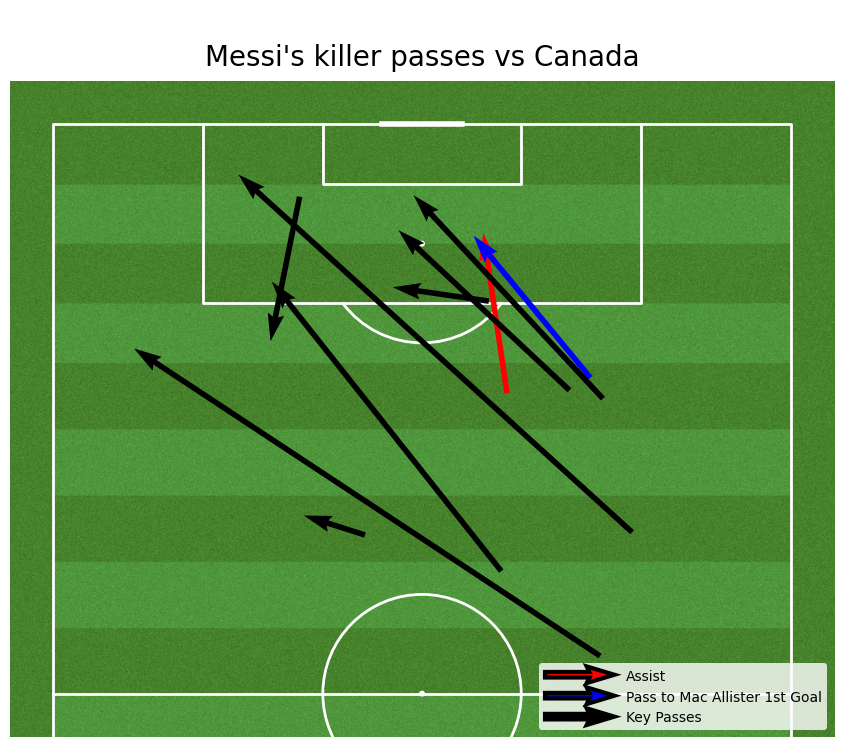

In [44]:
pitch = VerticalPitch(pitch_type='uefa', half=True, pitch_color='grass', line_color='white',
              stripe=True)

fig, axs = pitch.grid(endnote_height=0.01, endnote_space=0, figheight=8,
title_height=0.12, title_space=-0.03, axis=False, grid_height=0.82)

# fig.set_facecolor('#22312b')

# Plot Messi Assist
pitch.arrows(messi_assist['Start X'], messi_assist['Start Y'], messi_assist['End X'], messi_assist['End Y'],
            lw=3, color='red',
            label='Assist', ax=axs['pitch'])

# Plot Messi pass to Mac Allister
pitch.arrows(messi_mac_allister['Start X'], messi_mac_allister['Start Y'], messi_mac_allister['End X'], messi_mac_allister['End Y'],
            lw=3, color='blue',
            label='Pass to Mac Allister 1st Goal', ax=axs['pitch'])

# Plot Messi key passes
pitch.arrows(messi_key_passes['Start X'], messi_key_passes['Start Y'], messi_key_passes['End X'], messi_key_passes['End Y'],
            lw=3, color='black',
            label='Key Passes', ax=axs['pitch'])

# Set up the legend
legend = axs['pitch'].legend(facecolor='white', handlelength=5, edgecolor='None', loc='lower right')
for text in legend.get_texts():
    text.set_fontsize(10)
    
axs['title'].text(0.5, 0.5, "Messi's killer passes vs Canada", color='black', 
                  va='center', ha='center', fontsize=20)